In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_= pd.read_csv('../db/votacao_proposicao_votos_orientacao.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
def cleaning_data(df,partido,deputado):
    df['sigla_partido']=df['sigla_partido'].str.strip()
    check_partido = 'check_%s'%partido
    df_vo=df
    df_vo = df_vo[df_vo[check_partido]==1]


    sigla_orientaçao = 'sigla_orientaçao_%s'%(partido)
    voto_orientacao = 'voto_orientacao_%s'%(partido)

    cols = ['data_votacao','nome', 'voto' , voto_orientacao]

    df_vo = df[cols]

    df_vo = df_vo[df_vo['nome']==deputado]

    df_vo = df_vo[df_vo[voto_orientacao].notnull()]

    df_vo = df_vo[df_vo[voto_orientacao].isin(['Sim','Não'])]

    df_vo['voto']=df_vo['voto'].str.strip()
    df_vo = df_vo.loc[df_vo['voto'].isin(['Sim','Não'])]

    df = df_vo.copy()


    df['voto']=np.where(df['voto']=='Sim' ,1,0)
    df[voto_orientacao]=np.where(df[voto_orientacao]=='Sim' ,1,0)
    df['apoio'] = np.where(df['voto']==df[voto_orientacao],1,0)
    
    
    df['data_votacao'] = pd.to_datetime(df['data_votacao'], errors='coerce')
    df=df.sort_values(by=['data_votacao'])
    
    df['year'] = df['data_votacao'].dt.year
    df['month']= df['data_votacao'].dt.month
    df['day'] = df['data_votacao'].dt.day

    return(df)


In [5]:
def serch_partidos_datas(df,partido):
    for index, row in df.iterrows():
        if row['sigla_partido']==partido:
            return row['data_votacao']
        
def search_partidos_datas(df,deputado):
    df = df[df['nome']==deputado]
    df['sigla_partido']=df['sigla_partido'].str.strip()

    df=df.sort_values(by=['data_votacao'])
    
    partidos_deputado = list(df['sigla_partido'].unique())
    
    dp_datas=[]
    for partido in partidos_deputado:
        dp_datas.append(serch_partidos_datas(df,partido))
    
    partidos_datas=[]
    datas=[]
    partidos=[]
    for i in range(len(dp_datas)):
        ano = dp_datas[i].split('-')[0]
        mes = dp_datas[i].split('-')[1]
        partidoo = partidos_deputado[i]
        partidos_datas.append('%s-%s/%s'%(partidoo,mes,ano))
        datas.append(ano)
        partidos.append(partidoo)
    
    return(partidos_datas,partidos,datas)
    

In [6]:
def plot_density_yes(final_train,partido,deputado):
    ax = sns.kdeplot(final_train['year'][final_train['voto'] == 1], color="darkturquoise", shade=True)
    sns.kdeplot(final_train["year"][final_train[voto_orientacao] == 1], color="lightcoral", shade=True)
    plt.legend([deputado, partido])
    plt.title('Density Plot of Year for Yes Support')
    return(ax)

In [7]:
def plot_density_no(final_train,partido,deputado):
    ax = sns.kdeplot(final_train['year'][final_train['voto'] == 0], color="darkturquoise", shade=True)
    sns.kdeplot(final_train["year"][final_train[voto_orientacao] == 0], color="lightcoral", shade=True)
    plt.legend([deputado, partido])
    plt.title('Density Plot of Year for No Support')
    return(ax)

In [8]:
def partido_all(df,partido):
    sigla_orientaçao = 'sigla_orientaçao_%s'%(partido)
    voto_orientacao = 'voto_orientacao_%s'%(partido)
    cols = ['data_votacao','nome', 'voto' , voto_orientacao]

    df = df[cols]

    df = df[df[voto_orientacao].isin(['Sim','Não'])]
    df[voto_orientacao]=np.where(df[voto_orientacao]=='Sim' ,1,0)
    df['data_votacao'] = pd.to_datetime(df['data_votacao'], errors='coerce')
    df=df.sort_values(by=['data_votacao'])

    df['year'] = df['data_votacao'].dt.year
    df['month']= df['data_votacao'].dt.month
    df['day'] = df['data_votacao'].dt.day
    return(df)

In [9]:
partido='GOV.'
deputado = 'Jair Bolsonaro'
df = df_.copy()
sigla_orientaçao = 'sigla_orientaçao_%s'%(partido)
voto_orientacao = 'voto_orientacao_%s'%(partido)
partidos_datas,partidos,datas = search_partidos_datas(df,deputado)

final_train=cleaning_data(df,partido,deputado)

df_p_all = partido_all(df,partido)


In [10]:
final_train.describe()

,voto,voto_orientacao_GOV.,apoio,year,month,day
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,0.554550,0.540713,0.526344,2009.097924,6.725918,15.171368
std,0.497148,0.498472,0.499438,5.887659,3.269396,8.642800
min,0.000000,0.000000,0.000000,1998.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,2004.000000,4.000000,8.000000
50%,1.000000,1.000000,1.000000,2009.000000,6.000000,15.000000
75%,1.000000,1.000000,1.000000,2015.000000,10.000000,23.000000
max,1.000000,1.000000,1.000000,2018.000000,12.000000,31.000000


['PDC-05/1991', 'PPR-01/1993', 'PPB-09/1995', 'S.Part.-06/1997', 'PTB-02/2003', 'PFL-02/2005', 'PP-05/2005', 'PSC-03/2016', 'PSL-04/2018']


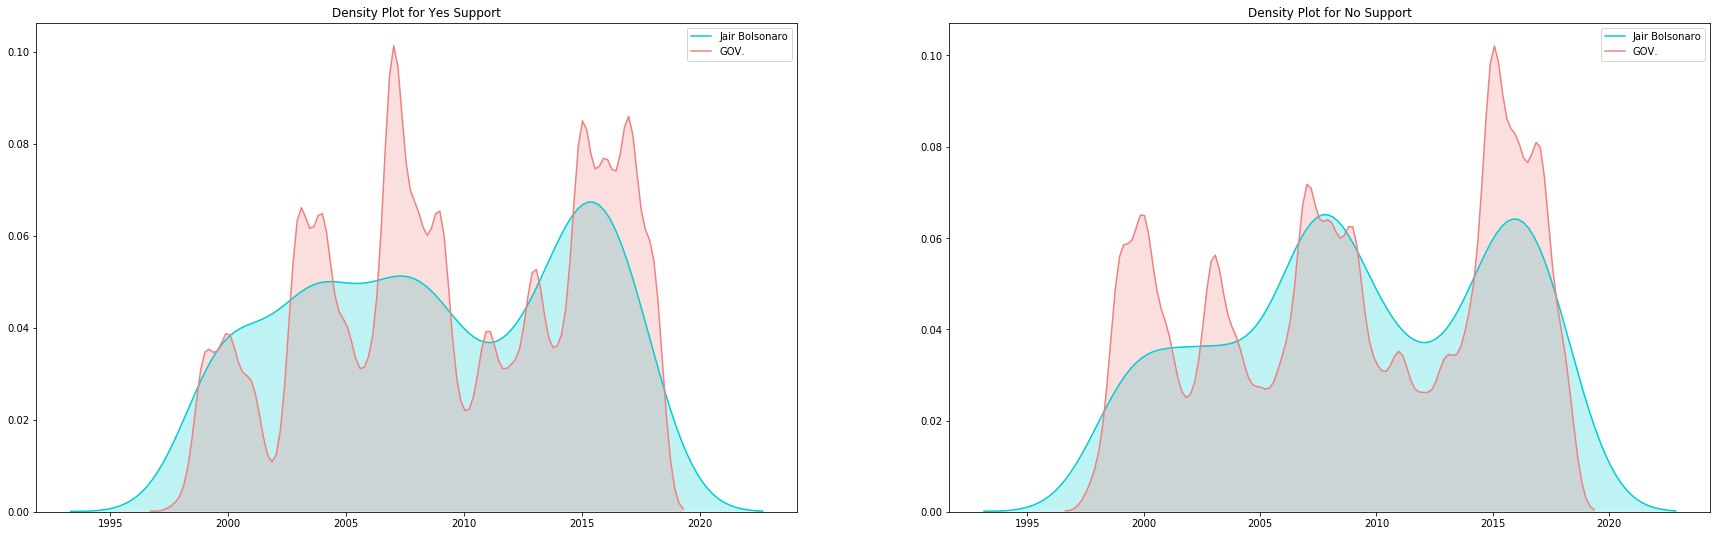

In [11]:
f, ax = plt.subplots(1, 2, figsize = (30, 9))

sns.kdeplot(final_train['year'][final_train['voto'] == 1], color="darkturquoise", shade=True,ax=ax[0])
sns.kdeplot(df_p_all["year"][df_p_all[voto_orientacao] == 0], color="lightcoral", shade=True,ax=ax[0])
ax[0].legend([deputado, partido])
ax[0].set_title('Density Plot for Yes Support')
# print(partidos_datas)

sns.kdeplot(final_train['year'][final_train['voto'] == 0], color="darkturquoise", shade=True,ax=ax[1])
sns.kdeplot(df_p_all["year"][df_p_all[voto_orientacao] == 1], color="lightcoral", shade=True,ax=ax[1])
ax[1].legend([deputado, partido])
ax[1].set_title('Density Plot for No Support')
print(partidos_datas)



['PDC-05/1991', 'PPR-01/1993', 'PPB-09/1995', 'S.Part.-06/1997', 'PTB-02/2003', 'PFL-02/2005', 'PP-05/2005', 'PSC-03/2016', 'PSL-04/2018']


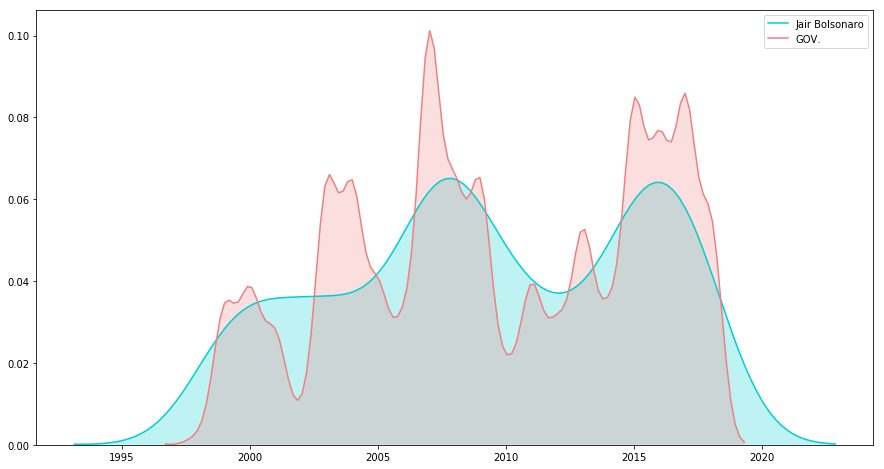

In [12]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train['year'][final_train['voto'] == 0], color="darkturquoise", shade=True)
sns.kdeplot(df_p_all["year"][df_p_all[voto_orientacao] == 0], color="lightcoral", shade=True)
plt.legend([deputado, partido])
# plt.title('Density Plot of Year for Yes Support')
print(partidos_datas)

In [13]:
partido='GOV.'
deputado = 'Jair Bolsonaro'
df = df_.copy()

partidos_datas,partidos,datas = search_partidos_datas(df,deputado)

final_train=cleaning_data(df,partido,deputado)

df_p_all = partido_all(df,partido)

['PDC-05/1991', 'PPR-01/1993', 'PPB-09/1995', 'S.Part.-06/1997', 'PTB-02/2003', 'PFL-02/2005', 'PP-05/2005', 'PSC-03/2016', 'PSL-04/2018']


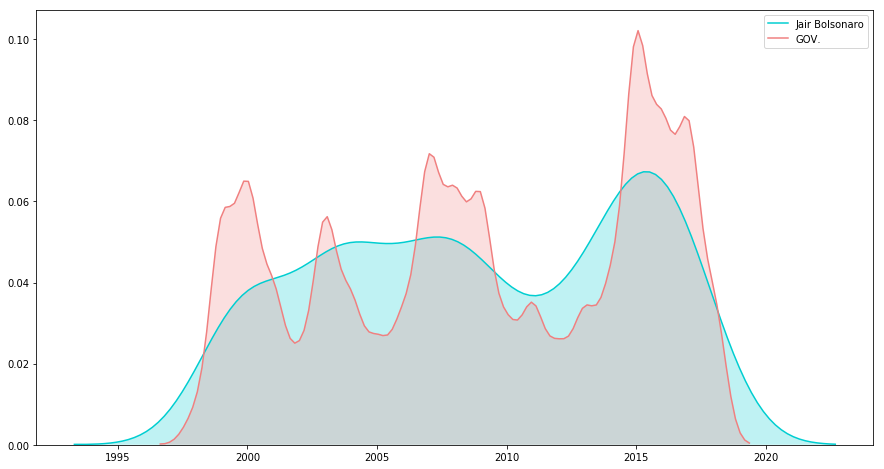

In [14]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(final_train['year'][final_train['voto'] == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_p_all["year"][df_p_all[voto_orientacao] == 1], color="lightcoral", shade=True)
plt.legend([deputado, partido])
# plt.title('Density Plot of Year for Yes Support')
print(partidos_datas)

['PDC-05/1991', 'PPR-01/1993', 'PPB-09/1995', 'S.Part.-06/1997', 'PTB-02/2003', 'PFL-02/2005', 'PP-05/2005', 'PSC-03/2016', 'PSL-04/2018']


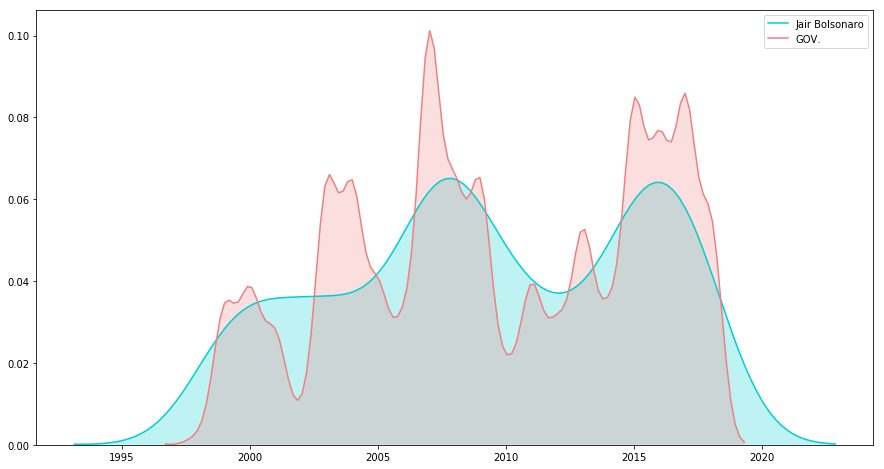

In [15]:
plt.figure(figsize=(15,8))


ax = sns.kdeplot(final_train['year'][final_train['voto'] == 0], color="darkturquoise", shade=True)
sns.kdeplot(df_p_all["year"][df_p_all[voto_orientacao] == 0], color="lightcoral", shade=True)
plt.legend([deputado, partido])
# plt.title('Density Plot of Year for Yes Support')
print(partidos_datas)

In [16]:
df = final_train

In [17]:
df = df.groupby(['year','month'],as_index=True).mean()


In [18]:
df = df.reset_index(level='month')

In [19]:
df.head()

,month,voto,voto_orientacao_GOV.,apoio,day
year,,,,,
1998,11,0.500000,0.875000,0.375000,12.500000
1998,12,0.000000,1.000000,0.000000,1.000000
1999,1,0.153846,0.769231,0.384615,12.538462
1999,2,1.000000,1.000000,1.000000,24.000000
1999,3,0.263158,0.368421,0.473684,12.210526


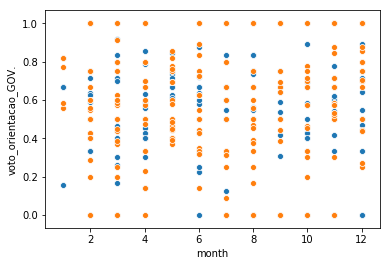

In [20]:
sns.scatterplot(x= df['month'],y = df['voto'])
sns.scatterplot(x= df['month'],y = df[voto_orientacao])

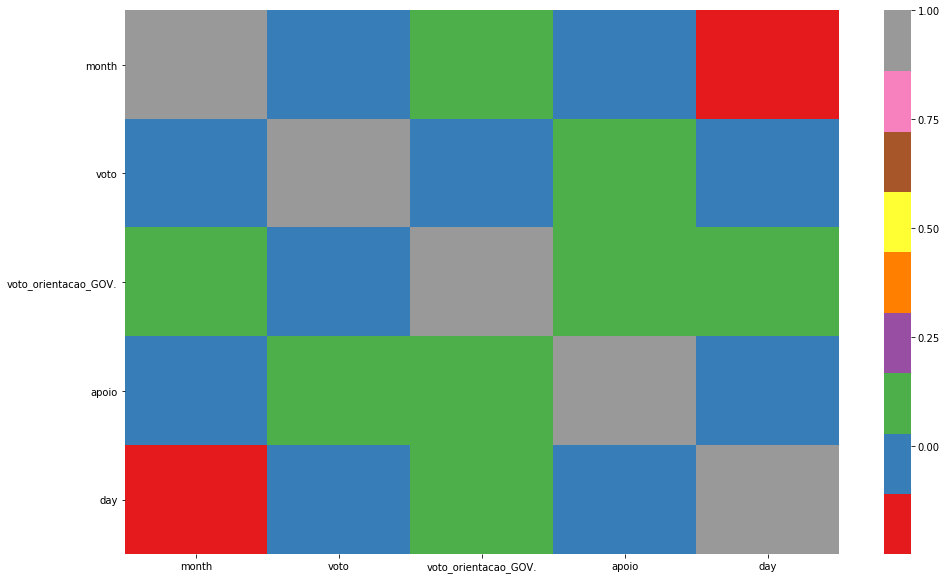

In [21]:
cor = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor,cmap='Set1')

In [22]:
partido='GOV.'
deputado = 'José Eduardo Cardozo'
df = df_.copy()
sigla_orientaçao = 'sigla_orientaçao_%s'%(partido)
voto_orientacao = 'voto_orientacao_%s'%(partido)
partidos_datas,partidos,datas = search_partidos_datas(df,deputado)

final_train=cleaning_data(df,partido,deputado)

df_p_all = partido_all(df,partido)


['PT-02/2003']


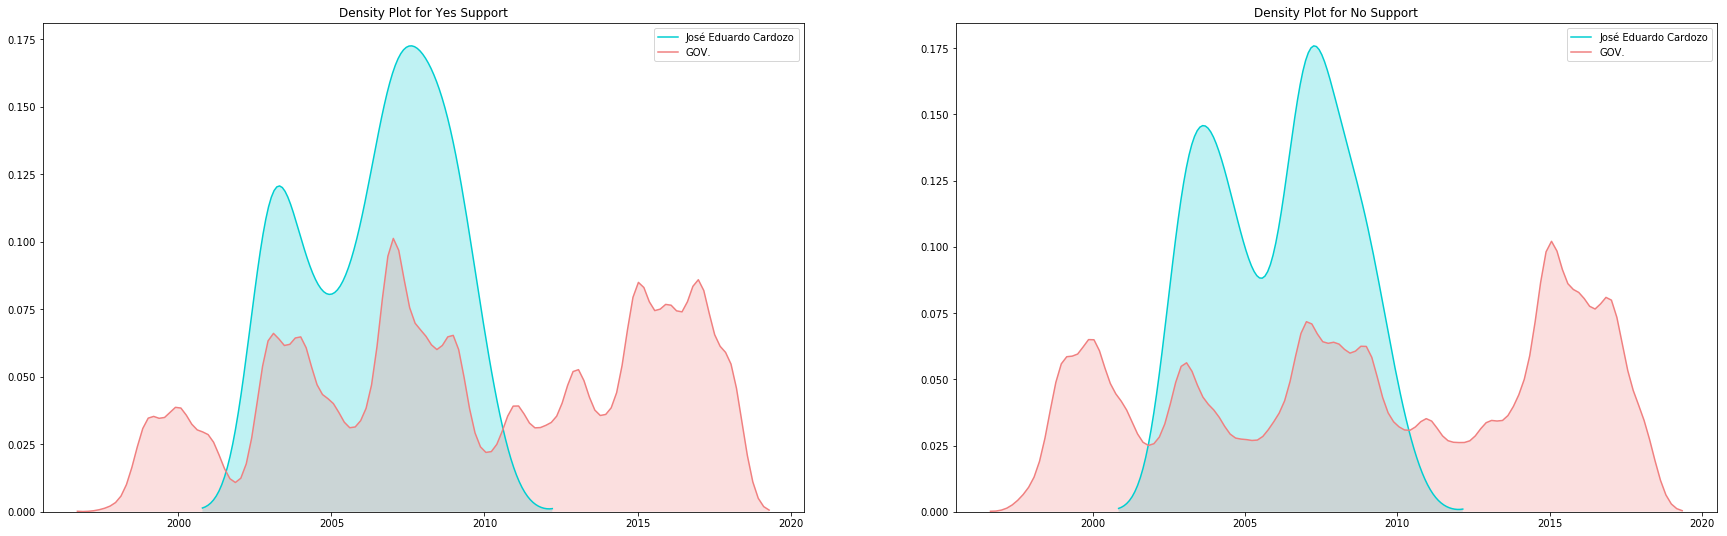

In [23]:
f, ax = plt.subplots(1, 2, figsize = (30, 9))

sns.kdeplot(final_train['year'][final_train['voto'] == 1], color="darkturquoise", shade=True,ax=ax[0])
sns.kdeplot(df_p_all["year"][df_p_all[voto_orientacao] == 0], color="lightcoral", shade=True,ax=ax[0])
ax[0].legend([deputado, partido])
ax[0].set_title('Density Plot for Yes Support')
# print(partidos_datas)

sns.kdeplot(final_train['year'][final_train['voto'] == 0], color="darkturquoise", shade=True,ax=ax[1])
sns.kdeplot(df_p_all["year"][df_p_all[voto_orientacao] == 1], color="lightcoral", shade=True,ax=ax[1])
ax[1].legend([deputado, partido])
ax[1].set_title('Density Plot for No Support')
print(partidos_datas)



In [24]:
dff_o= pd.read_csv('../db/votacao_proposicao_orientacao.csv')


In [25]:
dff_o.head()

,id_proposicao,tipo_proposicao_sigla,numero_proposicao,ano_proposicao,resumo_votacao,data_votacao,hora_votacao,objeto_votacao,cod_sessao,sigla_partido,orientacao_partido,data_captura,url_captura,numero_captura
0,180174,PL,643,1988,NaN,1999-06-22,18:10:00,SUBEMENDA N º 1 CCJR,362,PFL,Não,2018-11-12 20:12:30,http://www.camara.leg.br/SitCamaraWS/Proposico...,-1
1,180174,PL,643,1988,NaN,1999-06-22,18:10:00,SUBEMENDA N º 1 CCJR,362,PSDB,Não,2018-11-12 20:12:30,http://www.camara.leg.br/SitCamaraWS/Proposico...,-1
2,180174,PL,643,1988,NaN,1999-06-22,18:10:00,SUBEMENDA N º 1 CCJR,362,PMDB,Não,2018-11-12 20:12:30,http://www.camara.leg.br/SitCamaraWS/Proposico...,-1
3,180174,PL,643,1988,NaN,1999-06-22,18:10:00,SUBEMENDA N º 1 CCJR,362,PT,Sim,2018-11-12 20:12:30,http://www.camara.leg.br/SitCamaraWS/Proposico...,-1
4,180174,PL,643,1988,NaN,1999-06-22,18:10:00,SUBEMENDA N º 1 CCJR,362,PPB,Não,2018-11-12 20:12:30,http://www.camara.leg.br/SitCamaraWS/Proposico...,-1


In [26]:
partidos = list(dff_o['sigla_partido'].unique())

In [27]:
print(len(partidos))

142
